https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

In [30]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
print ("libraries loaded")

libraries loaded


In [31]:
data = sm.datasets.co2.load_pandas()
y = data.data
print ("type(y):", type(y), y.shape)

type(y): <class 'pandas.core.frame.DataFrame'> (2284, 1)


In [32]:
print (list(y))

['co2']


In [33]:
print (type(y.co2), y.co2[0], type(y.co2[0]))
print ("# of Nan:", y.shape[0] - y.count())

<class 'pandas.core.series.Series'> 316.1 <class 'numpy.float64'>
# of Nan: co2    59
dtype: int64


In [34]:
y.describe()

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


In [35]:
# The 'MS' string groups the data in buckets by start of the month
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html
#explanation of grouping codes.
#https://chrisalbon.com/python/pandas_group_data_by_time.html
#.resample('MS') = group by month start
y = y['co2'].resample('MS').mean()
print (type(y))
# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y.head())

<class 'pandas.core.series.Series'>
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64


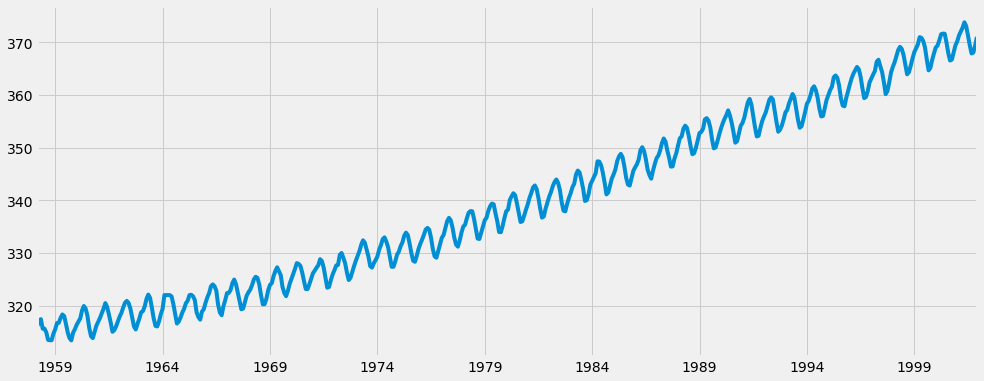

In [37]:
y.plot(figsize=(15, 6))
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html
plt.show()


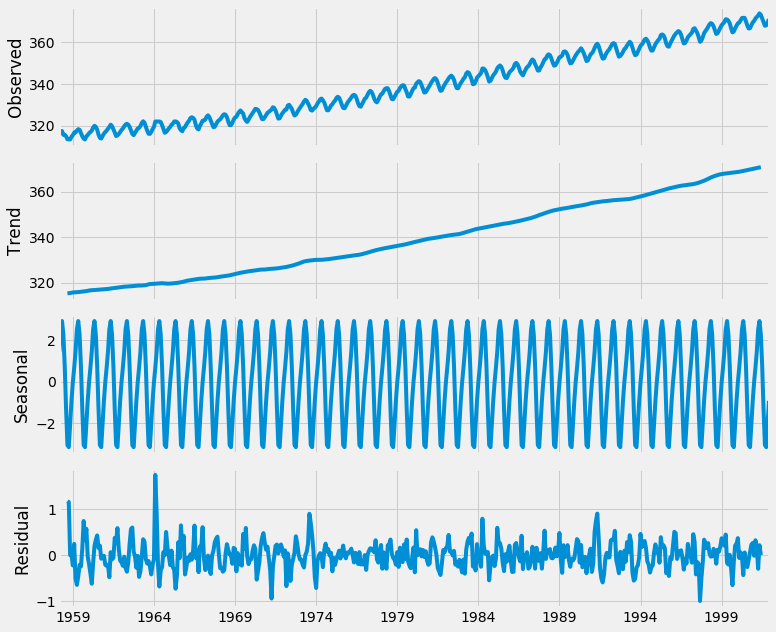

plotted


In [95]:
#time-series seasonal decomposition
#NB: this is useful in this data due to the seasonal effects, not all data will show seasonal effects.

from pylab import rcParams
#make plot larger for readability.
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()
print ("plotted")
#https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

In [38]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
print (type(p), p)
print (d)
print (q)

<class 'range'> range(0, 2)
range(0, 2)
range(0, 2)


In [40]:
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print (type(pdq), len(pdq), pdq)

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print (type(seasonal_pdq), len(seasonal_pdq))
print (seasonal_pdq)

<class 'list'> 8 [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
<class 'list'> 8
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [41]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [51]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

#http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

minResult = []
minParam = []
minParam_Seasonal = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            minResult.append( results.aic )
            minParam.append(param)
            minParam_Seasonal.append(param_seasonal)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            #NB: some parameter combinations might result in errors. catch errors and continue.
            continue
print ("end-----")
print (min(minResult))


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624030388
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.711172763911
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320026
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878427396604
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978072075
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.764791293389
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048755206244
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662328002069
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941066918753
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.41747168099
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1084.4559110767013
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.4315424893691
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893632262
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912989130537
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194091
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.79385497181556
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.9501759055394
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:376.9283759666373
ARI

In [53]:
index = minResult.index(min(minResult))
print (index)

print ("Minimum AIC value ", min(minResult), " occurs with SARIMAX(", minParam[index], ", ", minParam_Seasonal[index], ")" )


59
Minimum AIC value  277.780123881  occurs with SARIMAX( (1, 1, 1) ,  (1, 1, 1, 12) )


In [55]:
#redo the model using the optimum input parameters.
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(minParam[index]),
                                seasonal_order=(minParam_Seasonal[index]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3185      0.092      3.446      0.001       0.137       0.500
ma.L1         -0.6257      0.077     -8.173      0.000      -0.776      -0.476
ar.S.L12       0.0010      0.001      1.725      0.084      -0.000       0.002
ma.S.L12      -0.8768      0.026    -33.792      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.630      0.000       0.089       0.106


In [62]:
print (type(results.summary().tables) )
print (len(results.summary().tables))
print (len(results.summary().tables[0]))
print (len(results.summary().tables[2]))
print (type(results))

<class 'list'>
3
7
4
<class 'statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper'>


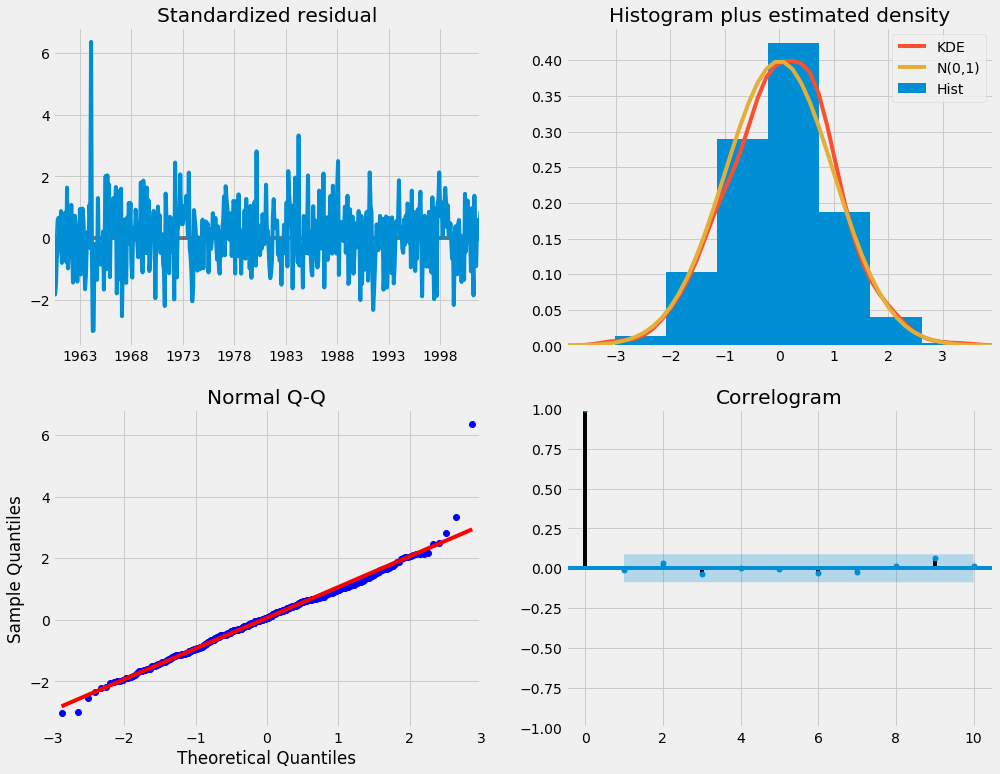

In [63]:
results.plot_diagnostics(figsize=(15, 12))
#http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.plot_diagnostics.html
#http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.html
plt.show()

- The red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.  
- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). This is a strong indication that the residuals are normally distributed.  
- The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.


In [72]:
#forecasts start 1st January 1998.
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print ("type(pred):", type(pred))
print (type(pred_ci), pred_ci.shape)

type(pred): <class 'statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper'>
<class 'pandas.core.frame.DataFrame'> (48, 2)


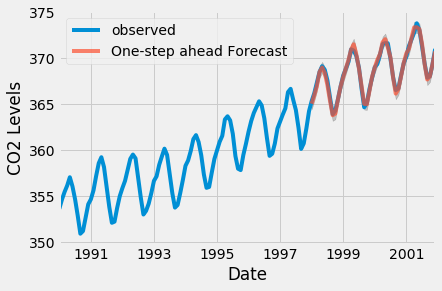

In [68]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

 forecasts align with the true values very well, showing an overall increase trend.

In [73]:
y_forecasted = pred.predicted_mean
print ("type(y_forecasted):", type(y_forecasted))
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print (type(mse))
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#if mean squared error were zero, prediction would be perfect.

type(y_forecasted): <class 'pandas.core.series.Series'>
<class 'float'>
The Mean Squared Error of our forecasts is 0.07


In [77]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
print ("type(pred_dynamic):", type(pred_dynamic))
print ("type(pred_dynamic_ci):", type(pred_dynamic_ci), pred_dynamic_ci.shape)
print (list(pred_dynamic_ci))

type(pred_dynamic): <class 'statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper'>
type(pred_dynamic_ci): <class 'pandas.core.frame.DataFrame'> (48, 2)
['lower co2', 'upper co2']


In [83]:
print (type(y), y.shape)
y.head()

<class 'pandas.core.series.Series'> (526,)


1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

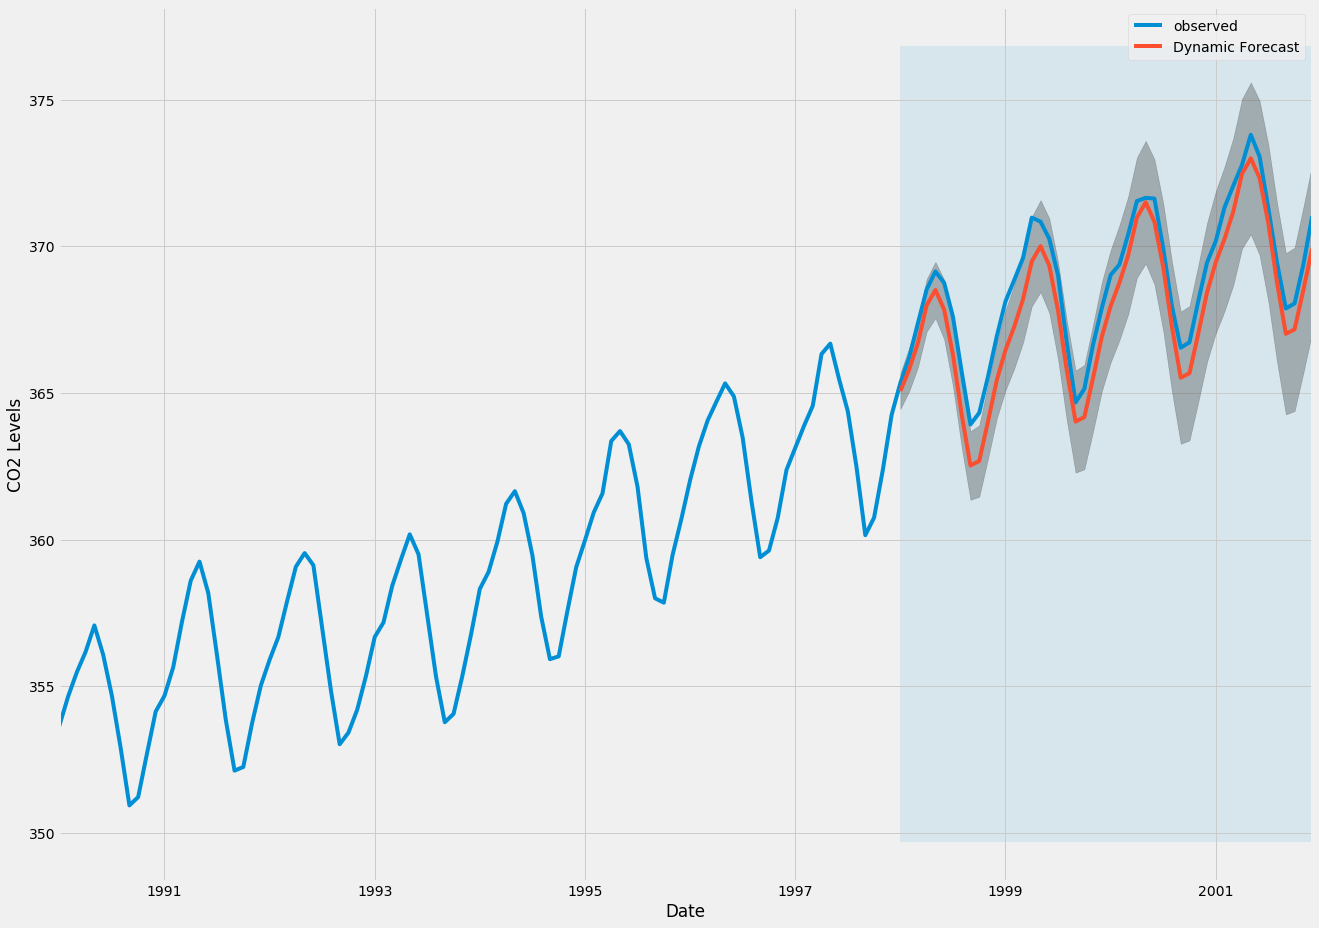

In [78]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
#figsize=(20, 15) sets plot dimensions
#

pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [85]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

print ("type(y_forecasted):", type(y_forecasted))
print ("type(y_truth):", type(y_truth))

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))



type(y_forecasted): <class 'pandas.core.series.Series'>
type(y_truth): <class 'pandas.core.series.Series'>
The Mean Squared Error of our forecasts is 1.01


nb: previous one step ahead calculated 0.97  
pred =         results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)  
vs  
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)  
nb: difference dynamic=T/F  


In [92]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)
print ("type(pred_uc):", type(pred_uc))

# Get confidence intervals of forecasts
#http://www.statsmodels.org/dev/dev/generated/statsmodels.base.model.GenericLikelihoodModelResults.conf_int.html
pred_ci = pred_uc.conf_int()
print ("type(pred_ci):", type(pred_ci), pred_ci.shape)
print ("pred_ci col names:", list(pred_ci))

type(pred_uc): <class 'statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper'>
type(pred_ci): <class 'pandas.core.frame.DataFrame'> (500, 2)
pred_ci col names: ['lower co2', 'upper co2']


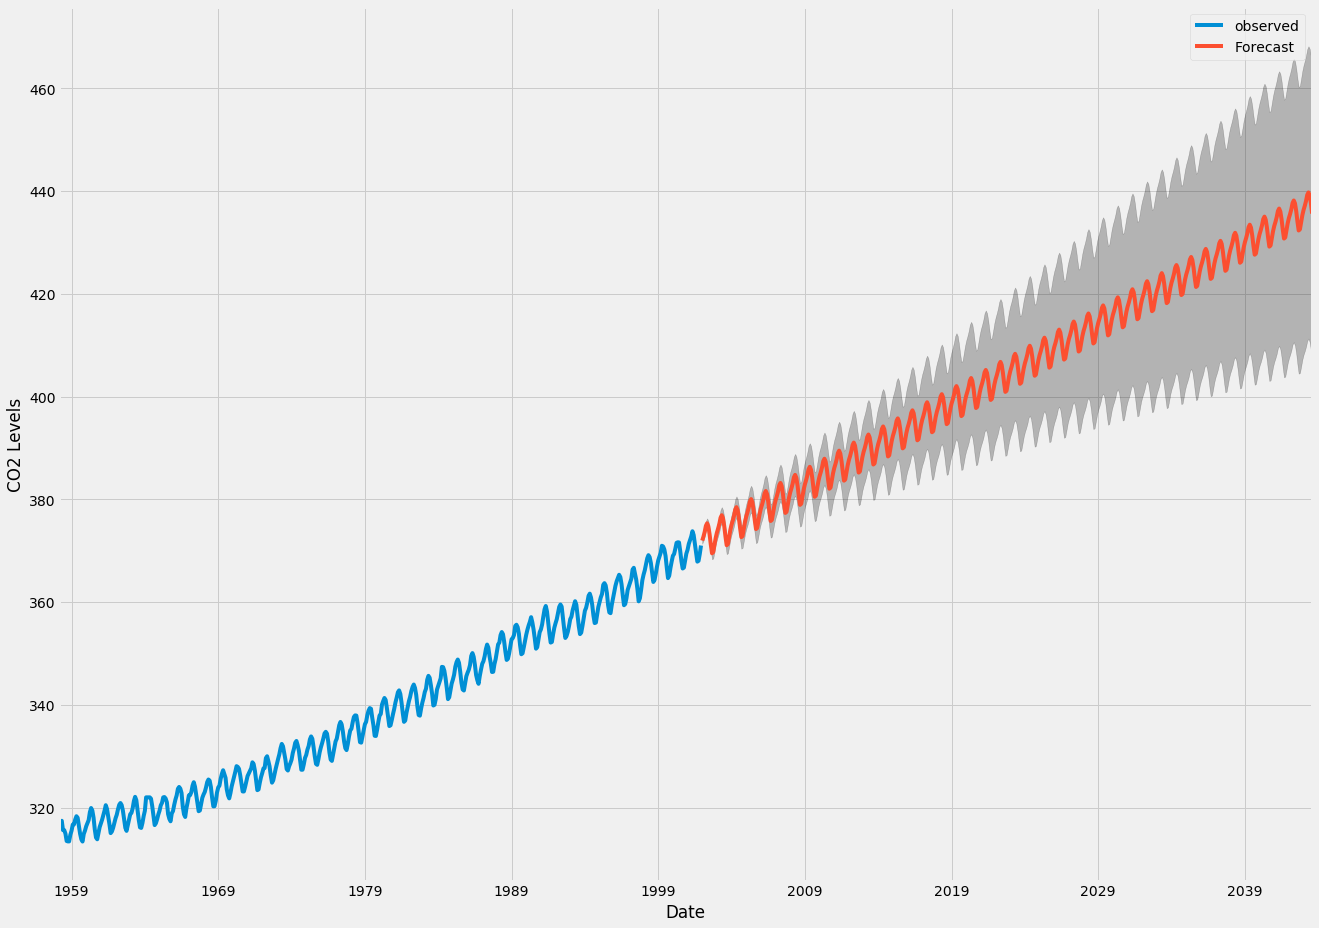

In [93]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()